In [2]:
from IPython.display import Image

## **Desenvolvimento comparativo**

### Neste exemplo, foram extraídos os dados do Yahoo Finance do índice Ibovespa para ilustrar como essas técnicas são aplicadas em análises financeiras. 'Crosstab' e 'Pivot Table' são ferramentas essenciais para resumir, analisar e visualizar dados em Pandas. Elas permitem uma melhor compreensão do comportamento do mercado ao longo do tempo.

## **Crosstab**

### DataFrame com novas colunas "bins", preparando o DataFrame para 'Crosstab':

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# Baixando dados do Ibovespa (Escolher um período)
ibov_yf = yf.download('^BVSP', start='2015-01-01', end='2023-04-25')

# Calculando retornos diários
ibov_yf['resultado'] = ibov_yf['Close'].pct_change() * 100

# Classificando retornos diários
ibov_yf['resultado_tres'] = np.where(ibov_yf['resultado'] > 1, 'maior_que_1%', 
                                     np.where(ibov_yf['resultado'] >= 0, 'zero_a_1%', 'negativo'))

# Adicionando coluna de "dia da semana"
ibov_yf['dia_semana'] = ibov_yf.index.strftime('%A')
ibov_yf

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,resultado,resultado_tres,dia_semana
Date,,,,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,48512.0,2882100,NaN,negativo,Friday
2015-01-05,48512.0,48512.0,47264.0,47517.0,47517.0,3866100,-2.051039,negativo,Monday
2015-01-06,47517.0,48061.0,47338.0,48001.0,48001.0,4559300,1.018583,maior_que_1%,Tuesday
2015-01-07,48006.0,49882.0,48006.0,49463.0,49463.0,4408800,3.045770,maior_que_1%,Wednesday
2015-01-08,49463.0,50261.0,49017.0,49943.0,49943.0,3621900,0.970422,zero_a_1%,Thursday
...,...,...,...,...,...,...,...,...,...
2023-04-17,106279.0,106830.0,105623.0,106016.0,106016.0,10253400,-0.247462,negativo,Monday
2023-04-18,106023.0,106475.0,105122.0,106163.0,106163.0,11207900,0.138658,zero_a_1%,Tuesday
2023-04-19,106149.0,106149.0,103604.0,103913.0,103913.0,12713600,-2.119382,negativo,Wednesday


### Neste Dataframe abaixo, temos a função 'Crosstab' aplicada:

In [2]:
# Criando crosstab
crosstab_dias_semana = pd.crosstab(ibov_yf['dia_semana'], ibov_yf['resultado_tres'])

# Adicionando colunas auxiliares
crosstab_dias_semana['Total_dias'] = crosstab_dias_semana.sum(axis=1)
crosstab_dias_semana.loc['Total_valores'] = crosstab_dias_semana.sum(axis=0)
crosstab_dias_semana['Neg%'] = crosstab_dias_semana['negativo'] / crosstab_dias_semana['Total_dias'] * 100

# Adicionando total geral
total_row = crosstab_dias_semana.sum(axis=0)
total_row.name = 'Total_valores'

# Visualizando o crosstab
crosstab_dias_semana

resultado_tres,maior_que_1%,negativo,zero_a_1%,Total_dias,Neg%
dia_semana,,,,,
Friday,84,202,119,405,49.876543
Monday,86,206,117,409,50.366748
Thursday,91,198,124,413,47.941889
Tuesday,103,190,117,410,46.341463
Wednesday,120,189,111,420,45.000000
Total_valores,484,985,588,2057,47.885270


## **Pivot Table**

### Agora é aplicada a função 'pd.pivot_table()' aos mesmos dados:

In [3]:
# Baixando dados do Ibovespa (Escolher um período)
ibov_yf = yf.download('^BVSP', start='2015-01-01', end='2023-04-25')

# Calculando retornos diários
ibov_yf['resultado'] = ibov_yf['Close'].pct_change() * 100

# Classificando retornos diários
ibov_yf['resultado_tres'] = np.where(ibov_yf['resultado'] > 1, 'maior_que_1%', 
                                     np.where(ibov_yf['resultado'] >= 0, 'zero_a_1%', 'negativo'))

# Adicionando coluna de "dia da semana"
ibov_yf['dia_semana'] = ibov_yf.index.strftime('%A')

# Criando pivot table
pivot_table_dias_semana = pd.pivot_table(
    ibov_yf,
    values='resultado',
    index='dia_semana',
    columns='resultado_tres',
    aggfunc=['count', 'mean']
)

# Definindo o MultiIndex das colunas
pivot_table_dias_semana.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in pivot_table_dias_semana.columns]

# Renomeando colunas para melhor visualização
pivot_table_dias_semana.columns = ['count_maior_que_1%', 'count_negativo', 'count_zero_a_1%',
                                   'mean_maior_que_1%', 'mean_negativo', 'mean_zero_a_1%']

# Preenchendo NaN com 0
pivot_table_dias_semana.fillna(0, inplace=True)

# Resetando o índice para remover os índices numéricos
pivot_table_dias_semana.reset_index(drop=True)

# Visualizando a pivot table sem os índices numéricos
pivot_table_dias_semana

[*********************100%%**********************]  1 of 1 completed


,count_maior_que_1%,count_negativo,count_zero_a_1%,mean_maior_que_1%,mean_negativo,mean_zero_a_1%
dia_semana,,,,,,
Friday,84,201,119,1.906963,-1.173818,0.477579
Monday,86,206,117,1.974979,-1.245742,0.477592
Thursday,91,198,124,1.900237,-1.152544,0.487819
Tuesday,103,190,117,2.092698,-0.932902,0.447592
Wednesday,120,189,111,1.824719,-1.126339,0.458909


## **Tabela comparativa**

### A seguir, uma tabela comparativa das funcionalidades de Crosstab e Pivot Table:

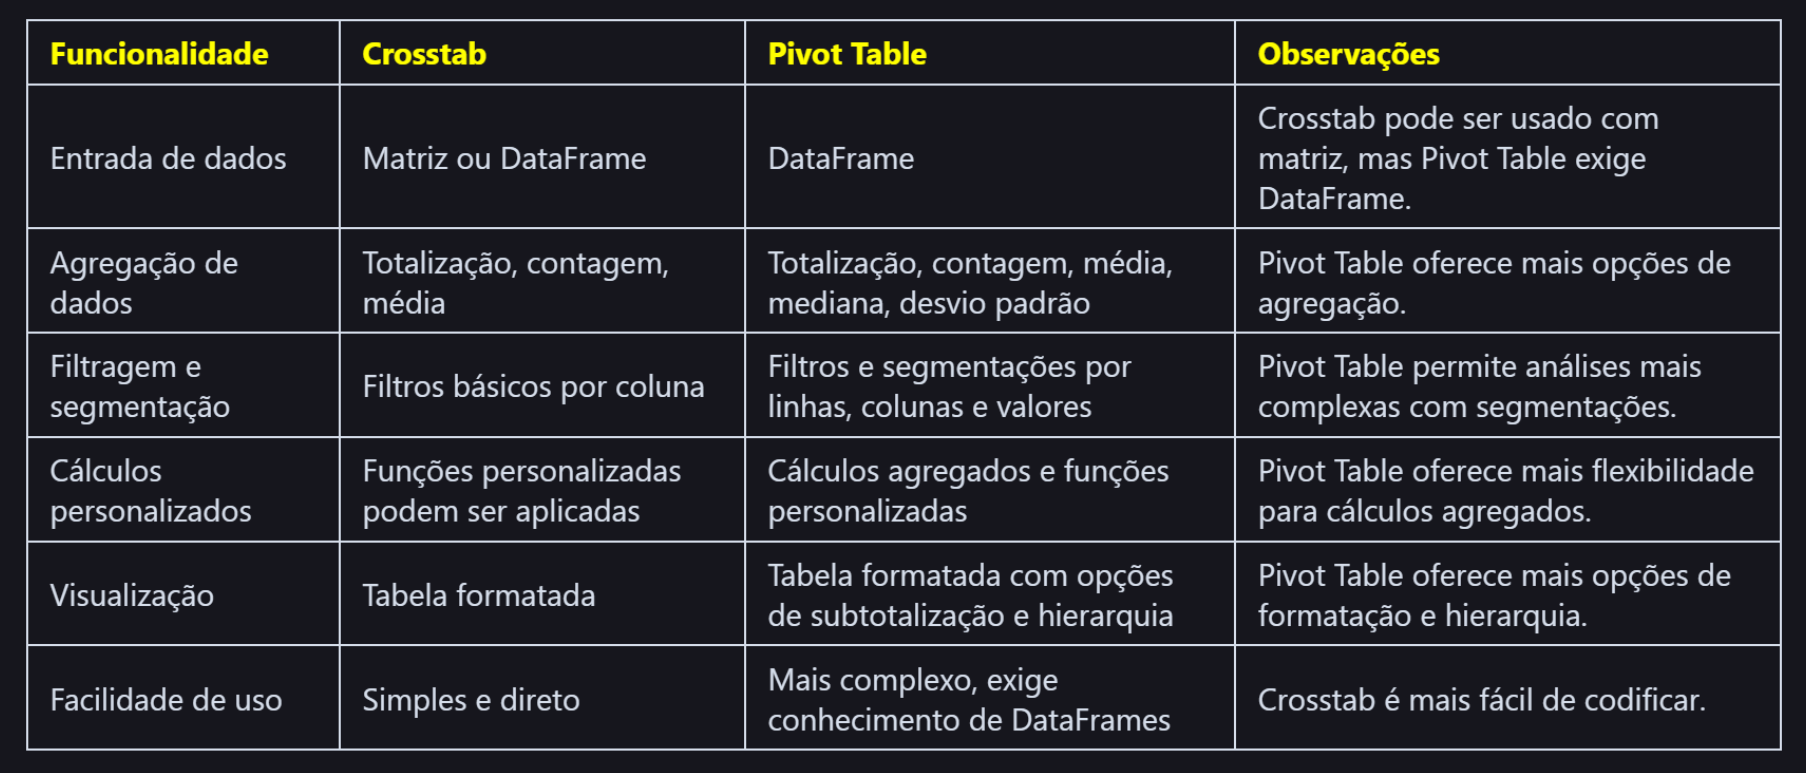